In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 34.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas_datareader as web 
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
plt.style.use('fivethirtyeight') 
from pandas_datareader import data as pdr
import yfinance as yf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title String fields { run: "auto" }

lista='HG=F' #@param ["AAPL","GME","AA","AABB","HG=F"]
yf.pdr_override() 

# Descargar el  dataframe
df = pdr.get_data_yahoo(lista, start="2017-01-01", end="2020-04-30") 

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.5270,2.5275,2.4800,2.4810,2.4810,590
2017-01-04,2.4970,2.5495,2.4970,2.5480,2.5480,742
2017-01-05,2.5540,2.5725,2.5270,2.5295,2.5295,306
2017-01-06,2.5175,2.5380,2.5050,2.5380,2.5380,340
2017-01-09,2.5340,2.5420,2.5150,2.5300,2.5300,236
...,...,...,...,...,...,...
2020-04-23,2.3210,2.3240,2.3130,2.3240,2.3240,341
2020-04-24,2.3250,2.3480,2.3240,2.3480,2.3480,589
2020-04-27,2.3430,2.3820,2.3265,2.3820,2.3820,731


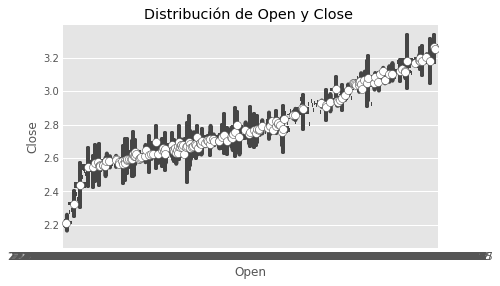

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Open',
        y     = 'Close',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución de Open y Close ');

In [ ]:
# Target variables
df=df.drop('Volume',axis=1)
df['SUBIO-BAJO']= np.where(df['Close'].shift(1) > df['Close'],0,1)

df.head(10)

,Open,High,Low,Close,Adj Close,SUBIO-BAJO
Date,,,,,,
2017-01-03,2.5270,2.5275,2.4800,2.4810,2.4810,1
2017-01-04,2.4970,2.5495,2.4970,2.5480,2.5480,1
2017-01-05,2.5540,2.5725,2.5270,2.5295,2.5295,0
2017-01-06,2.5175,2.5380,2.5050,2.5380,2.5380,1
2017-01-09,2.5340,2.5420,2.5150,2.5300,2.5300,0
2017-01-10,2.5620,2.6135,2.5620,2.6035,2.6035,1
2017-01-11,2.6045,2.6045,2.5905,2.6010,2.6010,0
2017-01-12,2.5970,2.6605,2.5970,2.6605,2.6605,1
2017-01-13,2.6415,2.6805,2.6410,2.6805,2.6805,1


In [ ]:
# División de los datos en train y test
# ==============================================================================
x=df.drop('SUBIO-BAJO',axis=1)
y=df['SUBIO-BAJO']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.426059
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             SUBIO-BAJO   No. Observations:                  626
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.3850
Time:                        17:41:49   Log-Likelihood:                -266.71
converged:                       True   LL-Null:                       -433.71
Covariance Type:            nonrobust   LLR p-value:                 5.026e-71
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1011      1.368     -0.074      0.941      -2.783       2.580
Open        -118.2850     12.

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
x_test = sm.add_constant(x_test, prepend=True)
predicciones = modelo.predict(exog = x_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 81.81818181818183%
